In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import numpy as np

mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [4]:
def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
  print(f"#{i}번째 폴드 처리 중")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model=build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=16,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

#0번째 폴드 처리 중
#1번째 폴드 처리 중
#2번째 폴드 처리 중
#3번째 폴드 처리 중


In [11]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
  print(f"#{i}번째 폴드 처리 중")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate(
      [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
  model=build_model()
  history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=16,verbose=0)
  mae_history=history.history['val_mae']
  all_mae_histories.append(mae_history)

#0번째 폴드 처리 중
#1번째 폴드 처리 중
#2번째 폴드 처리 중
#3번째 폴드 처리 중


In [12]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

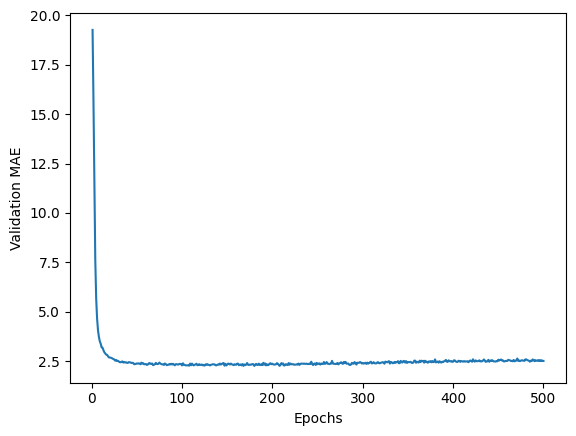

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

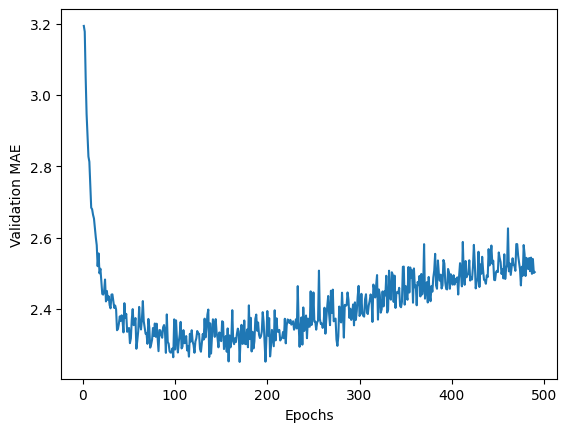

In [15]:
from os import truncate
truncated_mae_history=average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1),truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [16]:
model = build_model()
model.fit(train_data,train_targets,epochs=130,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.7653 - mae: 2.2575 


In [19]:
predictions=model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([8.1241045], dtype=float32)